In [1]:
%pip install opencv-python
%pip install numpy
%pip install matplotlib

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ------------------ --------------------- 18.1/38.8 MB 88.1 MB/s eta 0:00:01
   ---------------------------------------  38.8/38.8 MB 101.4 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 89.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


# Color Transformations

First, we can import some libraries to make transforming images more convenient.

In [2]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

## [Information Extraction]

### Image Reshaping and Histogram Plotting

In [4]:
def is_image(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))

For convenience, let's put the RGB colors in a tuple.

In [5]:
colors = ('b', 'g', 'r')

Next, let's resize the images to be 100x100 and save them in a new directory. Then, let's plot histograms for the RGB and HSV color spaces.

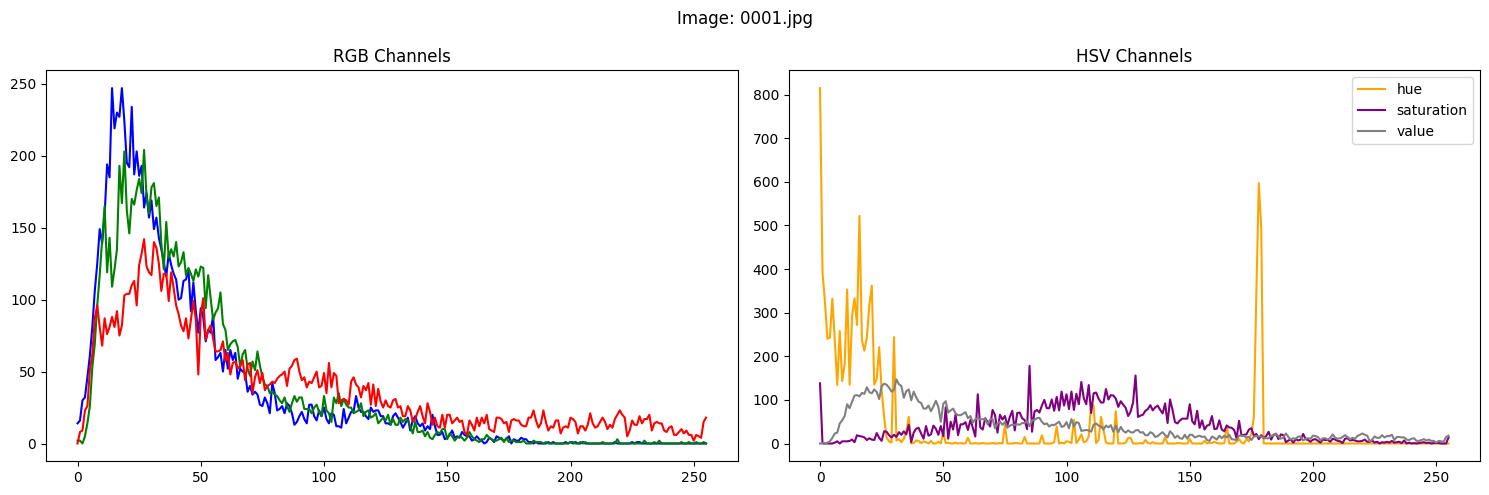

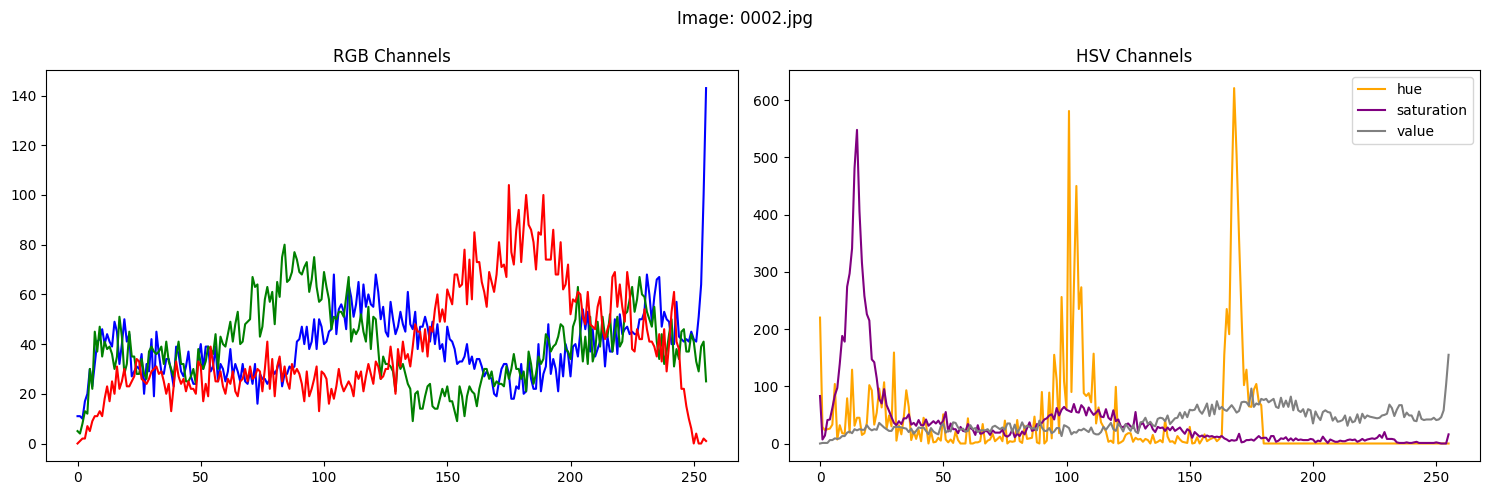

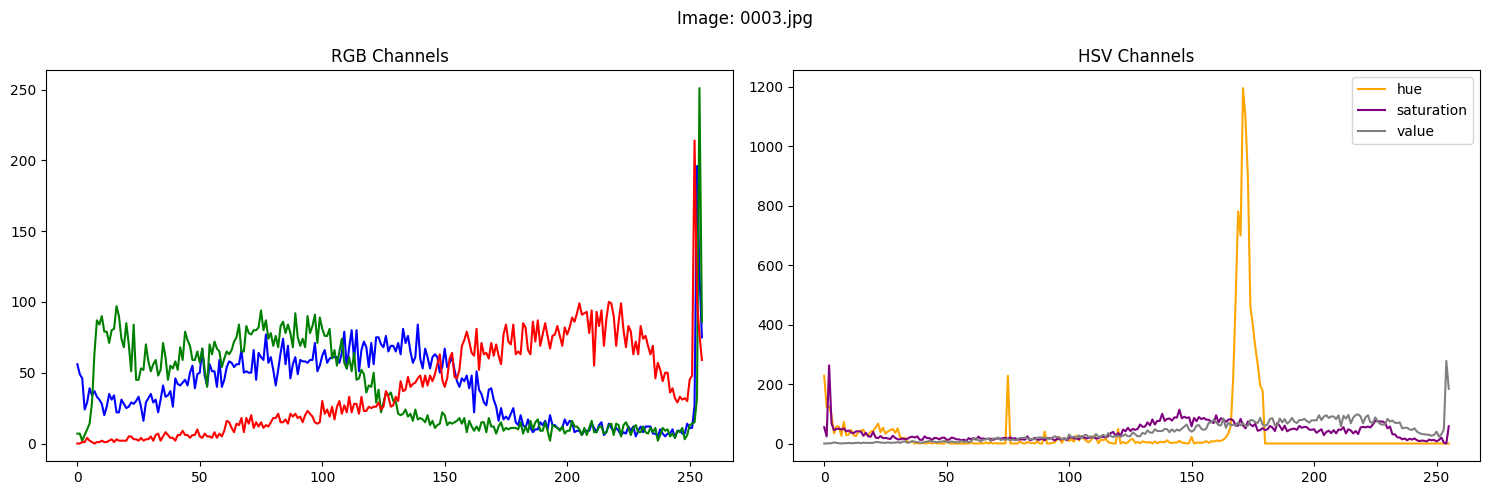

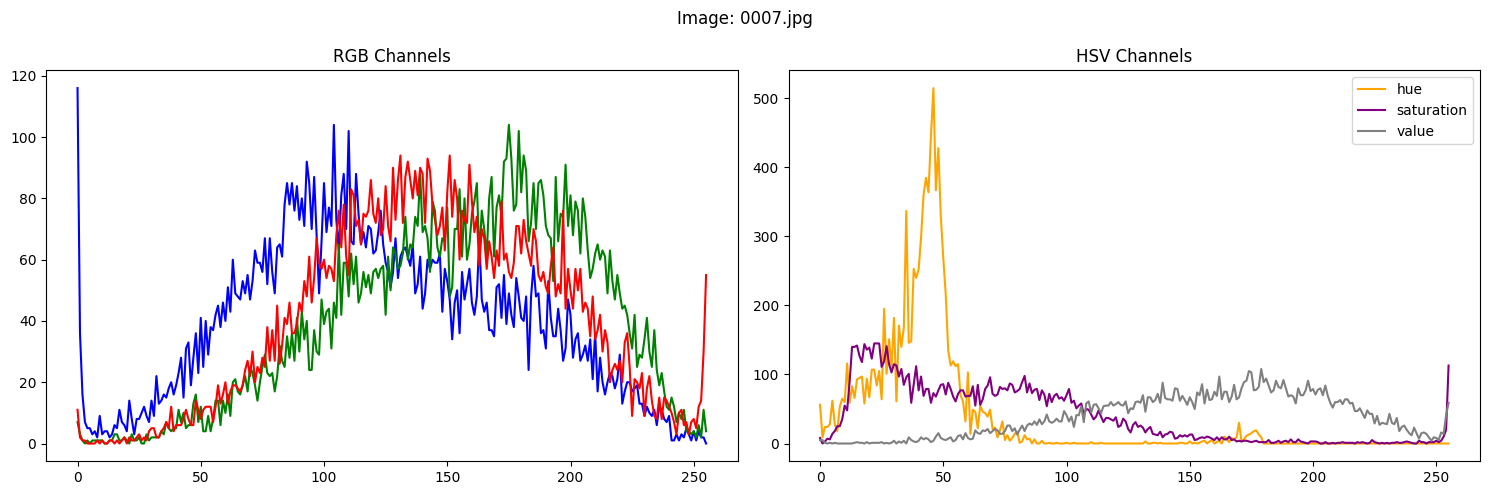

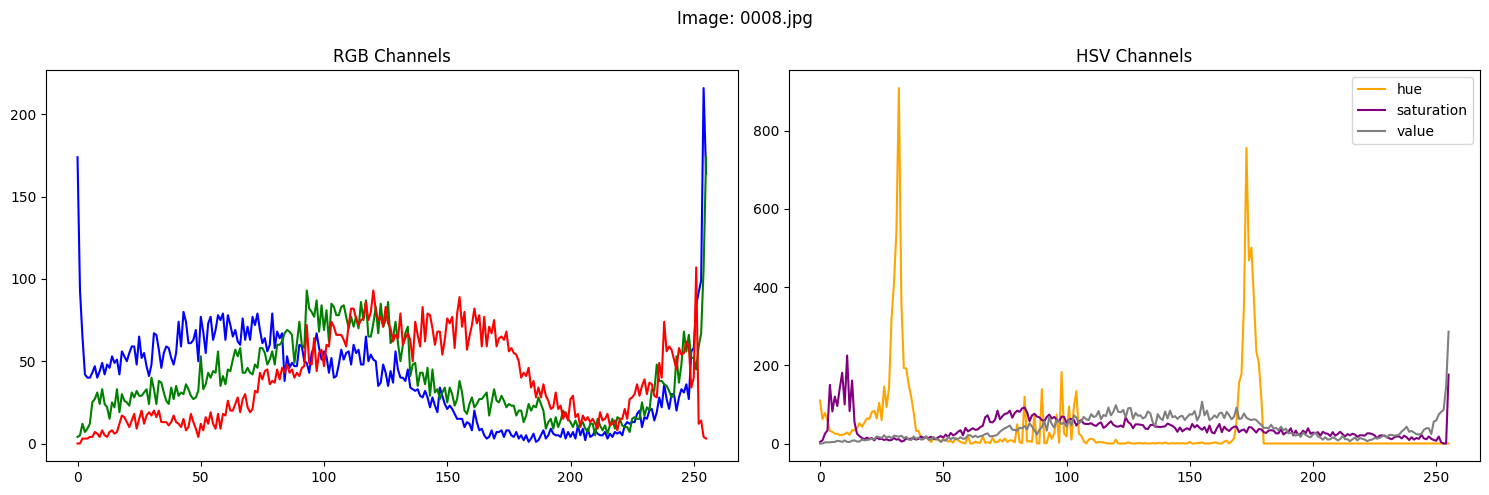

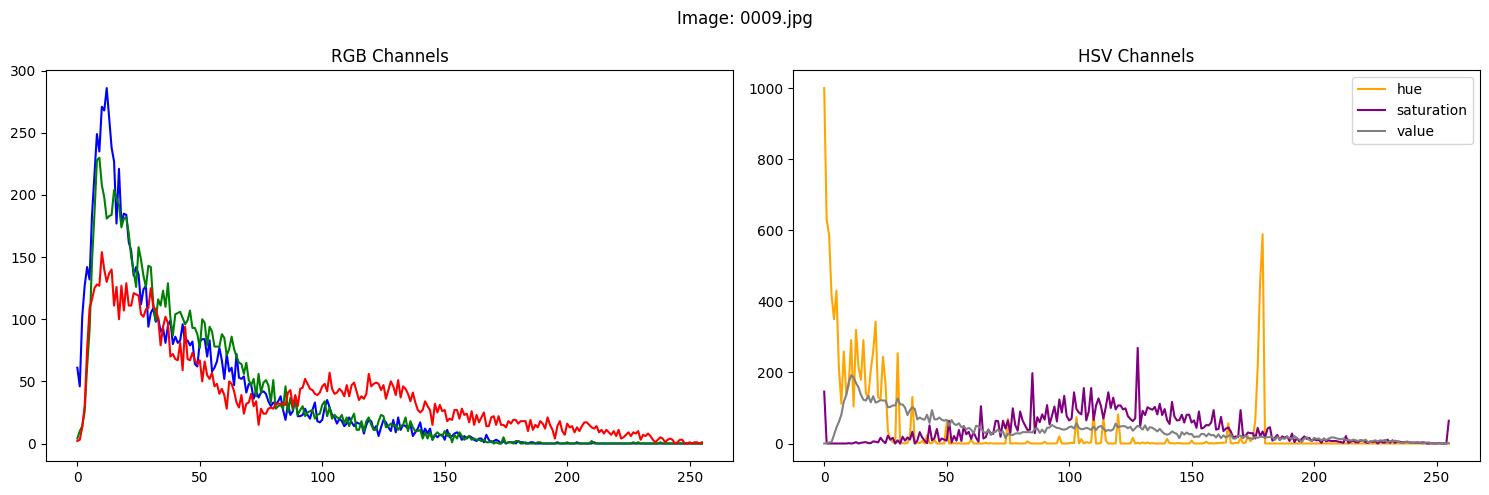

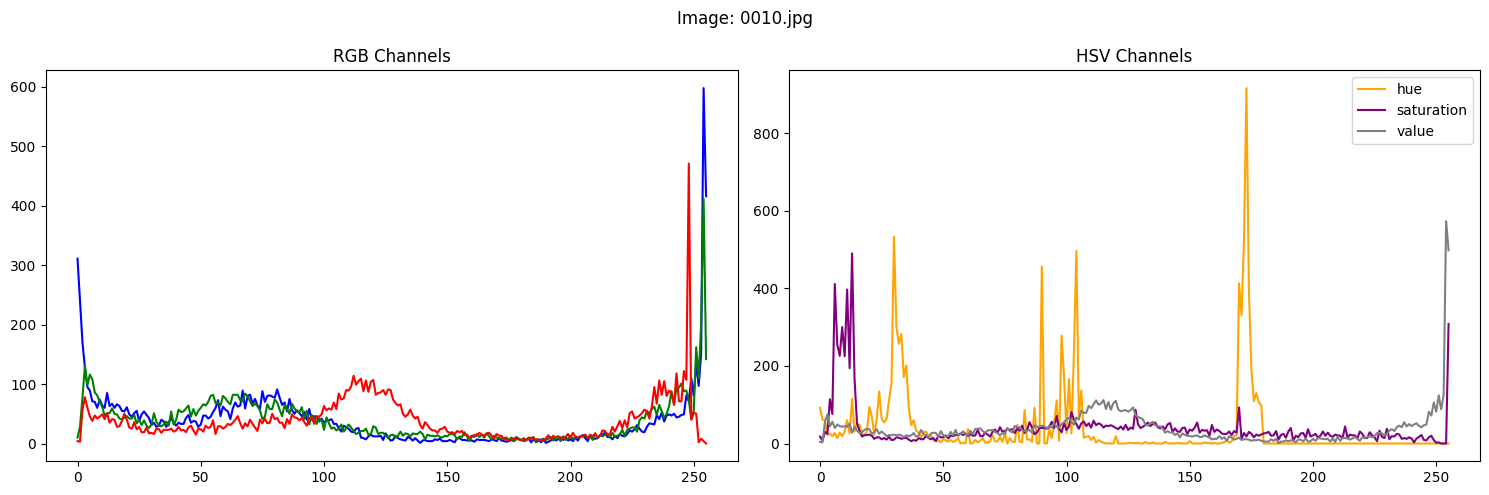

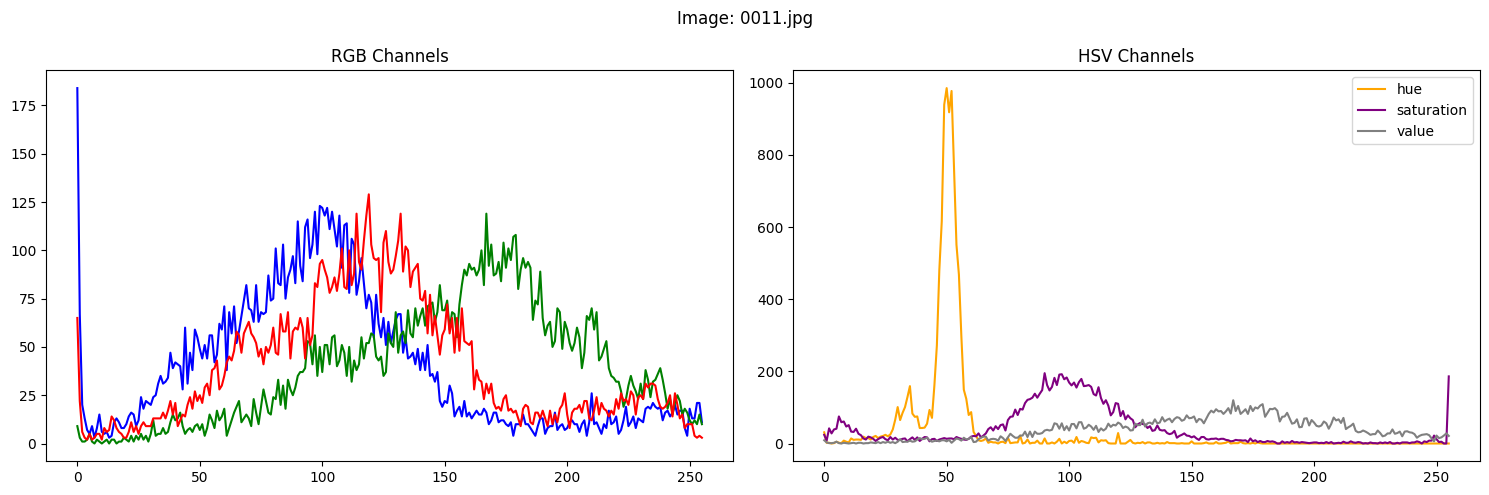

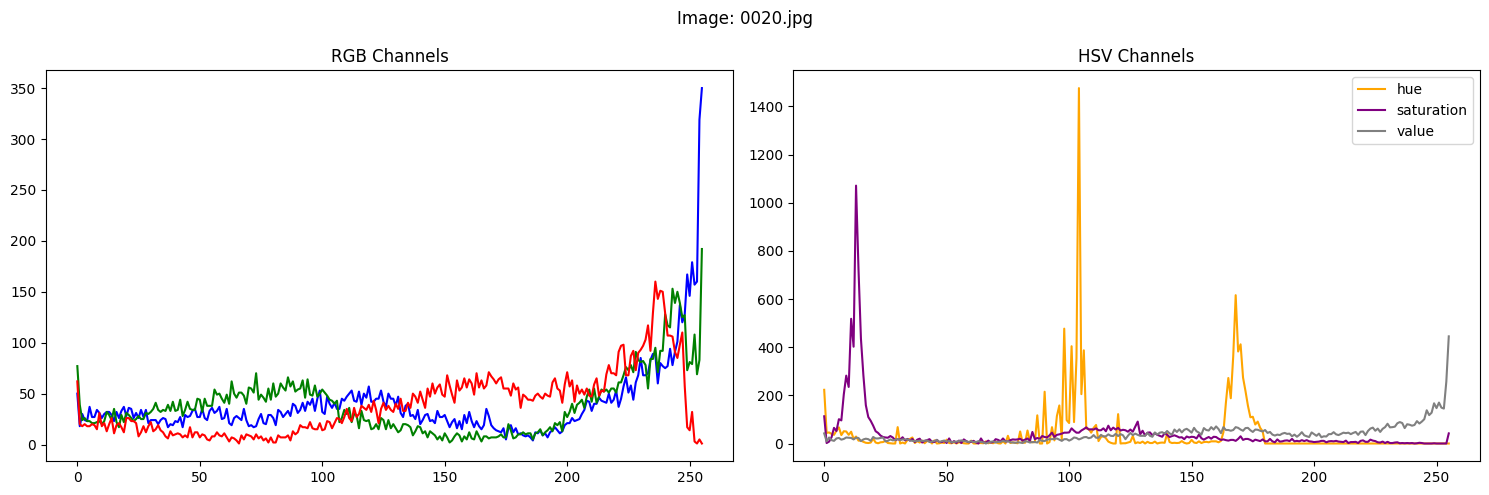

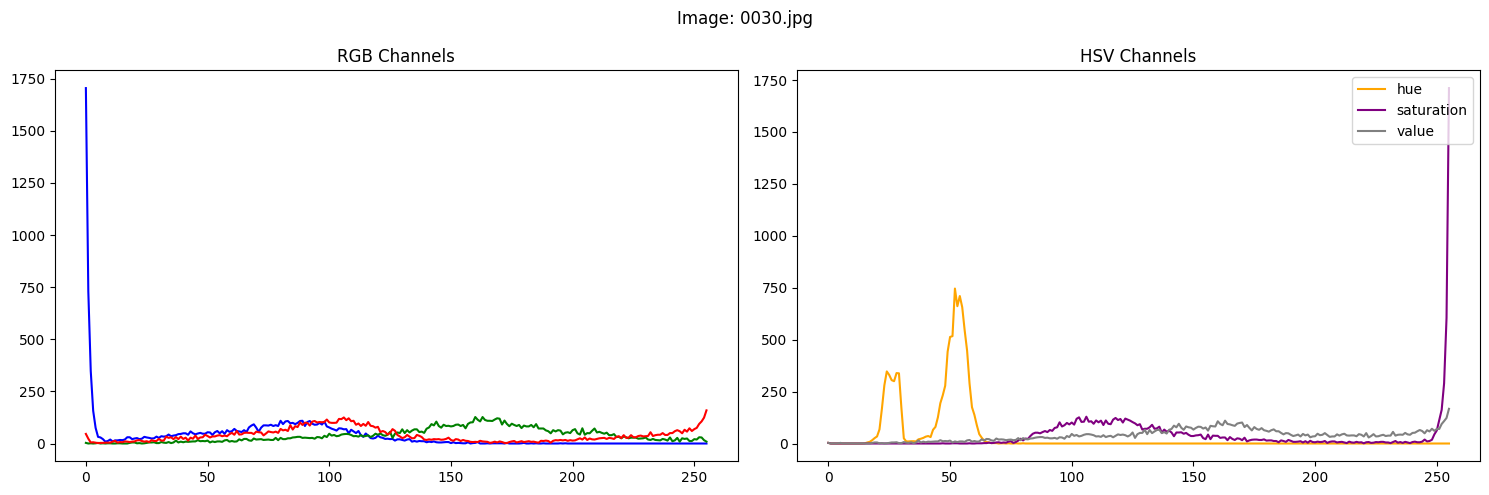

In [7]:
dataset_dir = 'dataset2'
output_dir = 'reshaped_dataset'
filenames = os.listdir(dataset_dir)

# Create a new folder for the output images
newpath = output_dir 
if not os.path.exists(newpath):
    os.makedirs(newpath)

images = []
for filename in filenames:

    # Read the images and skip non images in the dataset folder.
    if not is_image(filename):
        continue
    current_image = cv2.imread(f'{dataset_dir}/{filename}')

    # Reshape the images
    reshaped_image = cv2.resize(current_image, (100, 100))

    # Save the files as jpeg and save at the maximum possible quality.
    cv2.imwrite(f'{output_dir}/{filename.split(".")[0]}.jpg', reshaped_image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

    # Plot 2 histograms side by side
    plt.figure(figsize=(15, 5))

    # Plot the image's RGB values together in a histogram
    plt.subplot(1, 2, 1)
    for i, color in enumerate(colors):
        hist = cv2.calcHist([reshaped_image], [i], None, [256], [0,256])
        plt.plot(hist, color=color)
    plt.title(f'RGB Channels')

    # Convert the image colorspace to HSV
    hsv_img = cv2.cvtColor(reshaped_image, cv2.COLOR_BGR2HSV)
    labels = ['hue', 'saturation', 'value']
    hsi_colors = ['orange', 'purple', 'gray']

    # Plot the image's HSV values together in a histogram
    plt.subplot(1, 2, 2)
    for i, (color, label) in enumerate(zip(hsi_colors, labels)):
        hist = cv2.calcHist([hsv_img], [i], None, [256], [0,256])
        plt.plot(hist, color=color, label=label)
    plt.title('HSV Channels')

    plt.legend(loc='upper right')
    
    plt.suptitle(f'Image: {filename}')
    plt.tight_layout()
    plt.show()

### Color Space Analysis

By accumulating the values of channels and hues across all given images, we can identify the highest probability channels and hues. This approach is akin to constructing a color histogram, which represents the distribution of colors in an image by counting the number of pixels within specific color ranges. Such histograms are instrumental in image processing tasks, as they provide a statistical overview of color distribution, facilitating operations like image segmentation and object recognition (Sajid, 2024).

In [8]:
# Use the reshaped images
dataset_dir = 'reshaped_dataset'
filenames = os.listdir(dataset_dir)

# Initialize 256 zeros for each channel
total_red = np.zeros(256)
total_blue = np.zeros(256)
total_green = np.zeros(256)
total_hue = np.zeros(256)

for filename in filenames:
    if not is_image(filename):
        continue

    current_image = cv2.imread(f'{dataset_dir}/{filename}')
    # Convert the image colorspace to HSV
    hsv_img = cv2.cvtColor(current_image, cv2.COLOR_BGR2HSV)

    # Calculate the histograms for each channel
    red_hist = cv2.calcHist([current_image], [2], None, [256], [0,256])
    green_hist = cv2.calcHist([current_image], [1], None, [256], [0,256])
    blue_hist = cv2.calcHist([current_image], [0], None, [256], [0,256])
    hue_hist = cv2.calcHist([hsv_img], [0], None, [256], [0,256])

    # Accumulate the histograms
    total_red += red_hist.flatten()
    total_green += green_hist.flatten()
    total_blue += blue_hist.flatten()
    total_hue += hue_hist.flatten()

# Get the maximum RGB channel values
max_red = np.max(total_red)
max_green = np.max(total_green)
max_blue = np.max(total_blue)

# Get the highest probability channel
if max_red > max_green and max_red > max_blue:
    color = 'red'
elif max_green > max_red and max_green > max_blue:
    color = 'green'
elif max_blue > max_red and max_blue > max_green:
    color = 'blue'

color

'blue'

In [9]:
# Get the top three highest probability hues
top_hues = np.argsort(total_hue)[-3:]

for i in top_hues:
    print(f'Hue: {i}, Count: {total_hue[i]}')

Hue: 172, Count: 2352.0
Hue: 0, Count: 2783.0
Hue: 173, Count: 2986.0


- In the RGB space, which channel is most likely to be observed for all images?

It was found that the blue channel is the most likely to be observed across all the images in the dataset.

- In the HSV space, which top three hues are most likely to be observed for all images?

It was found that the hues 0, 172, 173 are the three most likely to be observed across all the images in the dataset.

## [Data Cleaning]

In [10]:
def image_intensity(img):
    bgr = np.float32(img)/255

    # Retrieve the values of each channel
    blue = bgr[:, :, 0]
    green = bgr[:, :, 1]
    red = bgr[:, :, 2]

    # The mean of the three channels is the intensity.
    return np.divide(blue + green + red, 3)

dataset_dir = "dataset2"
filenames = os.listdir(dataset_dir)
for filename in filenames:
    current_image = cv2.imread(f'{dataset_dir}/{filename}')
    rgb_img = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
    print(filename, end=": ")
    print(np.mean(image_intensity(rgb_img)))


0001.jpg: 0.2197718
0002.jpg: 0.54183334
0003.jpg: 0.4939529
0007.jpg: 0.55365705
0008.jpg: 0.47389743
0009.jpg: 0.20679967
0010.jpg: 0.47300068
0011.jpg: 0.5002711
0020.jpg: 0.61908305
0030.jpg: 0.44542038


In [11]:
def is_night(img):
    # Convert the image to grayscale.
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Get the mean of the grayscale image.
    brightness = np.mean(gray_img)

    # Return True if the mean is less than the threshold
    return brightness < 50 # change this to smth if u want

def is_pink(img):
    # Convert the image to HSV.
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    pink_lower = np.array([140, 50, 50]) # Pink range lower bound
    pink_upper = np.array([180, 255, 255]) # Pink range upper bound
    mask = cv2.inRange(hsv_img, pink_lower, pink_upper) 

    pink_frac = (np.sum(mask) / mask.size) * 100
    
    return pink_frac > 35

def clean_data(input_dir, output_dir_cleaned):
    if not os.path.exists(output_dir_cleaned):
        os.makedirs(output_dir_cleaned)

    for filename in os.listdir(input_dir):
        if is_image(filename):
            img = cv2.imread(os.path.join(input_dir, filename))

            if not (is_night(img) or not is_pink(img)):
                output_path = os.path.join(output_dir_cleaned, filename)
                cv2.imwrite(output_path, img)
                
    print(f"Data cleaned and saved to {output_dir_cleaned}")

output_dir_cleaned = 'output_dir_cleaned'
clean_data(dataset_dir, output_dir_cleaned)

Data cleaned and saved to output_dir_cleaned


- What mathematical or statistical bases have you considered when developing your function?

Brightness Threshold: Average brightness (mean grayscale value) under 50 is considered "night."
Pink Detection: Image converted to HSV; pink hue range is checked. If more than 20% of the pixels are pink, it's accepted. (DataTechNotes, 2023)

- What are the challenges in re-orienting the images in this action item?

Lighting: Different lighting conditions can affect color detection accuracy. For instance, under non-standard lighting, color recognition can become challenging, resulting in inaccurate results. (Typeset, n.d.)

- What can you suggest for automating such a task?

Adaptive Thresholds: Dynamically adjust brightness and color thresholds based on dataset characteristics. Unlike global thresholding, which applies a single threshold value across the entire image, adaptive thresholding calculates thresholds for smaller regions, enhancing accuracy in diverse illumination scenarios (GeeksforGeeks, n.d.). <br/>
ML Models: Use pre-trained models for better pink color and night detection. Models trained on extensive datasets can recognize and classify colors and lighting conditions with high accuracy, facilitating efficient image analysis without the need for extensive custom training (Analytics Vidhya, 2020).

In [12]:
def adjust_exposure(img, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def calculate_gamma(reference_img, target_img):
    reference_brightness = np.mean(cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY))
    target_brightness = np.mean(cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY))
    
    gamma = reference_brightness / target_brightness
    return gamma

def adjust_saturation(img, ref_saturation):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    saturation_channel = hsv_img[:, :, 1]
    
    saturation_channel = cv2.equalizeHist(saturation_channel)
    
    normalized_saturation = saturation_channel * (ref_saturation / np.mean(saturation_channel))
    hsv_img[:, :, 1] = np.clip(normalized_saturation, 0, 255)
    
    return cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

def calculate_saturation(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return np.mean(hsv_img[:, :, 1])

def adjust_images(input_dir, output_dir, ref_img_path_exp, ref_img_path_sat):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    ref_img_exp = cv2.imread(ref_img_path_exp)
    ref_img_sat = cv2.imread(ref_img_path_sat)

    ref_saturation = calculate_saturation(ref_img_sat)

    for filename in os.listdir(input_dir):
        if is_image(filename):
            img = cv2.imread(os.path.join(input_dir, filename))

            gamma = calculate_gamma(ref_img_exp, img)
            img_adjusted_exposure = adjust_exposure(img, gamma)

            img_adjusted_saturation = adjust_saturation(img_adjusted_exposure, ref_saturation)

            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, img_adjusted_saturation)
    
    print(f"Exposure and saturation adjusted images saved to {output_dir}")

ref_img_path_exp = 'dataset2/0009.jpg'
ref_img_path_sat = 'dataset2/0030.jpg'
output_dir = 'output_dir_adjusted'
adjust_images('output_dir_cleaned', output_dir, ref_img_path_exp, ref_img_path_sat)

Exposure and saturation adjusted images saved to output_dir_adjusted


## [Modified Data Augmentation]

In [13]:
filename = 'reshaped_dataset/0001.jpg'

In [14]:
image = cv2.imread(filename)

### Changing Saturation

We can adjust an image's saturation by converting it to the HSV (Hue, Saturation, Value) color space, modifying the saturation channel, and then converting it back to BGR or RGB. This approach leverages the separation of chromatic content (hue and saturation) from luminance (value), allowing us to target and enhance color intensity effectively (OpenCV Documentation, 2024).

In [15]:
def change_saturation(image, factor=1.0):
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    h, s, v = cv2.split(hsv_img)

    s = np.clip(s * factor, 0, 255).astype(np.uint8)

    hsv_img = cv2.merge([h, s, v])

    return cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

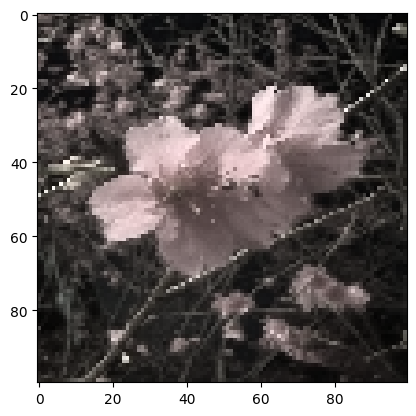

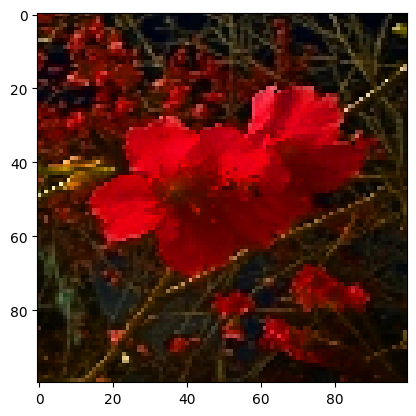

In [16]:
desaturated_img = change_saturation(image, 0.25)
saturated_img = change_saturation(image, 2.5)

plt.imshow(desaturated_img[..., ::-1])
plt.show()

plt.imshow(saturated_img[..., ::-1])
plt.show()

### Adding Patches

For the geometric transformations, we can just apply the saturation adjustment afterwards.

In [17]:
# Create a function to randomly put a rectangular black patch over a portion of the image.
# Uses the max between the image's width and height to determine the max size of the patch.
def put_random_black_patch(image, min_size=10, max_size=max(image.shape[:2]), s_factor=1.0):
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Generate random patch size
    patch_width = random.randint(min_size, min(max_size, width))
    patch_height = random.randint(min_size, min(max_size, height))
    
    # Generate random position for the patch
    x = random.randint(0, width - patch_width)
    y = random.randint(0, height - patch_height)
    
    # Create the black patch
    image[y:y+patch_height, x:x+patch_width] = 0
    
    return change_saturation(image, s_factor)

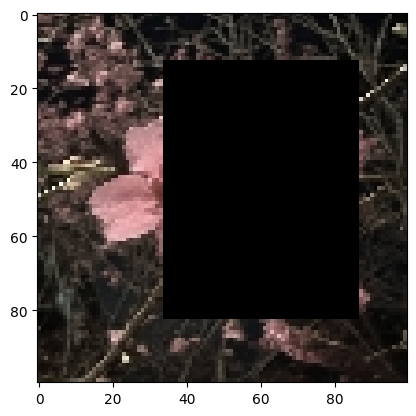

In [18]:
patched_img = put_random_black_patch(image, s_factor=0.6)
plt.imshow(patched_img[..., ::-1])
plt.show()

### Translating

Apply saturation change after translation.

In [19]:
image = cv2.imread(filename)

In [20]:
def shift_image(image, displacement, vertical=True, s_factor=1.0):
    height, width = image.shape[:2]

    if vertical:
        translation_matrix = np.float32([[1, 0, 0], [0, 1, -displacement]])
    else:
        translation_matrix = np.float32([[1, 0, displacement], [0, 1, 0]])

    shifted_image = cv2.warpAffine(image, translation_matrix, (width, height))
    return change_saturation(shifted_image, s_factor)

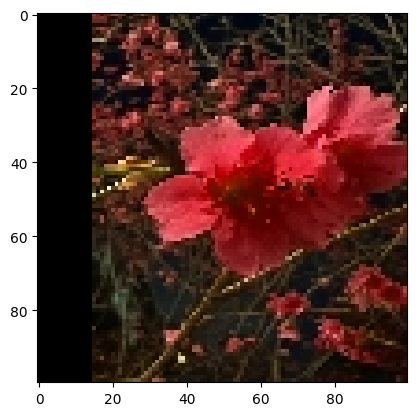

In [21]:
translated_img = shift_image(image, 15, vertical=False, s_factor=1.5)
plt.imshow(translated_img[..., ::-1])
plt.show()

### Rotating

Apply saturation change after rotation.

In [22]:
def rotate_image(image, angle, scale=1.0, s_factor=1.0):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return change_saturation(rotated_image, s_factor)

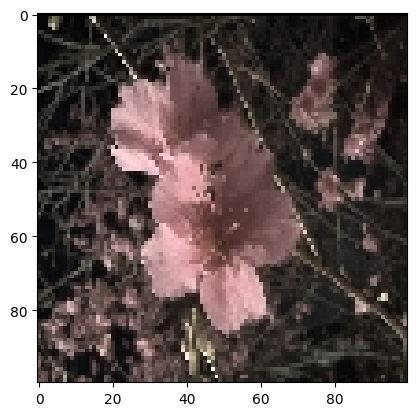

In [23]:
rotated_img = rotate_image(image, 90, s_factor=0.5)
plt.imshow(rotated_img[..., ::-1])
plt.show()

In [28]:
def augment_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if is_image(filename):
            img = cv2.imread(os.path.join(input_dir, filename))

            rotated_img = rotate_image(img, 45, 0.75, 1.0)
            translated_img = shift_image(rotated_img, 15, vertical=False, s_factor=1.0)
            reshaped_img = cv2.resize(translated_img, (100, 100))
            final_img = put_random_black_patch(reshaped_img, s_factor=1.0)

            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, final_img)

augment_images('output_dir_adjusted', 'output_dir_augmented')

# References

- Sajid, H. (2024, April 10). Demystifying color histograms: A guide to image processing and analysis. Retrieved from https://zilliz.com/learn/demystifying-color-histograms
- OpenCV Documentation. (2024). Changing colorspaces in OpenCV. Retrieved from https://docs.opencv.org
- DataTechNotes. (2023, July 15). Color detection with HSV color space in OpenCV. Retrieved from https://www.datatechnotes.com/2023/07/color-detection-with-hsv-color-space-in.html
- Typeset. (n.d.). How do different lighting conditions affect color accuracy? Retrieved from https://typeset.io/questions/how-do-different-lighting-conditions-affect-color-accuracy-20l52m2two?utm_source=chatgpt.com
- GeeksforGeeks. (2023, Jan 4). Python thresholding techniques using OpenCV – Set 2 (adaptive thresholding). Retrieved from https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-2-adaptive-thresholding/
- Huilgol P. (2024, Nov 28). Top 4 pre-trained models for image classification with Python code. Retrieved from https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/